In [1]:
import acgan
import tqdm
import twodlearn as tdl
import tensorflow as tf
import tensorflow_datasets as tfds
from functools import reduce
import matplotlib.pyplot as plt
BATCH_SIZE = 128
acgan.data.DATA_DIR = '/data/marinodl/tensorflow_datasets'
session = tf.InteractiveSession()


In [2]:
#tfds.list_builders()

In [3]:
dataset, info = acgan.data.load_celeb_a(BATCH_SIZE)
input_shape = dataset.output_shapes.as_list()

Instructions for updating:
Colocations handled automatically by placer.


W0328 22:55:26.588606 139622322624320 deprecation.py:323] From /data/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [4]:
input_shape

[None, 64, 64, 3]

In [5]:
model = acgan.model.DCGAN(
    embedding_size=256,
    generator={'init_shape':(4, 4, 256),
               'units': [1024, 512, 256, 128, 3],
               'kernels': [(3, 3), (3, 3), (4, 4), (4, 4), (4, 4)],
               'strides': [[1, 1], [2, 2], [2, 2], [2, 2], [2, 2]],
               'padding': ['same', 'same', 'same', 'same', 'same']},
    discriminator={'units':[128, 256, 512, 1024],
                   'kernels':4,
                   'strides':2,
                   'dropout':None}
)
# model.noise_rate.init(rate=0.001)

In [6]:
model.generator.compute_output_shape(input_shape = [None, 100])

TensorShape([Dimension(None), Dimension(64), Dimension(64), Dimension(3)])

In [7]:
iter = dataset.make_one_shot_iterator()
xreal = iter.get_next()

gen = model.generator_trainer(BATCH_SIZE, learning_rate=0.0002)
#dis = model.discriminator_trainer(BATCH_SIZE, input_shape[1:])
dis = model.discriminator_trainer(BATCH_SIZE, xreal=xreal, learning_rate=0.0002)

Instructions for updating:
Use tf.cast instead.


W0328 22:55:30.528216 139622322624320 deprecation.py:323] From /data/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


W0328 22:55:30.563591 139622322624320 deprecation.py:323] From /data/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [8]:
tdl.core.variables_initializer(gen.variables).run()
tdl.core.variables_initializer(dis.variables).run()
#tf.global_variables_initializer().run()

In [9]:
print('step {} | dis {} | gen {}'.format(dis.train_step.eval(), dis.loss.eval(), gen.loss.eval()) )

step 0 | dis 0.6932739019393921 | gen 0.6931028366088867


In [10]:
acgan.train.run_training(dis=dis, gen=gen, n_steps=1000)

  0%|          | 1/1000 [00:01<24:28,  1.47s/it]

step 1 | dis 0.5388677716255188 | gen 0.6865599155426025


 10%|█         | 101/1000 [01:06<09:32,  1.57it/s]

step 101 | dis 1.2947254180908203 | gen 0.24482502043247223


 20%|██        | 201/1000 [02:07<09:46,  1.36it/s]

step 201 | dis 0.5146875381469727 | gen 1.3289031982421875


 30%|███       | 301/1000 [03:07<06:43,  1.73it/s]

step 301 | dis 0.4978289008140564 | gen 1.1911609172821045


 40%|████      | 401/1000 [04:08<06:24,  1.56it/s]

step 401 | dis 0.4977174401283264 | gen 0.9542379379272461


 50%|█████     | 501/1000 [05:10<05:47,  1.44it/s]

step 501 | dis 0.467701256275177 | gen 0.922950267791748


 60%|██████    | 601/1000 [06:09<03:23,  1.96it/s]

step 601 | dis 0.602813720703125 | gen 0.7974749803543091


 70%|███████   | 701/1000 [07:10<03:36,  1.38it/s]

step 701 | dis 0.7220040559768677 | gen 2.929678440093994


 80%|████████  | 801/1000 [08:09<02:15,  1.47it/s]

step 801 | dis 0.47352007031440735 | gen 1.2523698806762695


 90%|█████████ | 901/1000 [09:07<01:05,  1.51it/s]

step 901 | dis 0.5362356305122375 | gen 0.8431893587112427


100%|██████████| 1000/1000 [10:04<00:00,  1.76it/s]


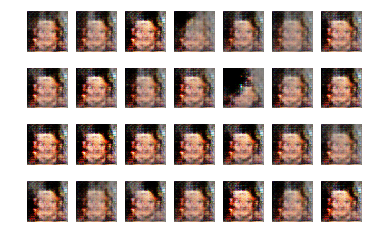

In [11]:
import matplotlib.pyplot as plt
import numpy as np
xsim = dis.xsim.eval()
for i in range(4*7):
    plt.subplot(4,7, i+1)
    plt.imshow(np.squeeze((xsim[i][:,:,:]+1)*0.5))
    plt.axis('off')

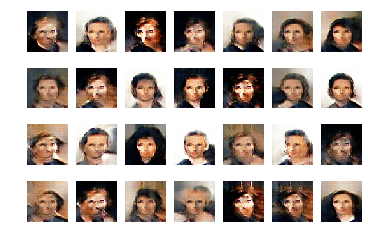

In [18]:
import matplotlib.pyplot as plt
import numpy as np
xsim = dis.xsim.eval()
for i in range(4*7):
    plt.subplot(4,7, i+1)
    plt.imshow(np.squeeze((xsim[i][:,:,:]+1)*0.5))
    plt.axis('off')